# 1-Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [26]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 2-Get the data

In [7]:
path1 = 'obtrain-ml.csv'

df = pd.read_csv(path1, header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,0.345081,0.746197,-1.090600,-1.080283,-0.271744,0.071893,-0.750719,1.320688,0.695390,1.163406,...,0.432794,-0.343324,-1.237080,0.392683,-1.937201,1.273496,0.471206,0.088425,-0.754906,-1.0
1,-1.238198,-0.990755,0.471342,-0.101829,-1.129983,0.341522,1.189618,-0.720331,0.104180,-1.092291,...,-1.290025,0.139505,0.117134,-0.186936,0.408618,0.237257,-1.110670,-0.645378,1.779565,-1.0
2,-0.008384,0.834482,0.726280,-1.889651,0.927735,-0.167712,0.570338,0.808293,-1.187723,-0.093282,...,-1.068939,-1.592181,-0.709196,0.754166,-0.060812,-0.646838,-0.774647,0.161045,-1.289014,-1.0
3,-0.082521,0.900501,1.673648,0.935160,1.558300,-0.406216,-0.735869,0.540115,-0.494145,-0.496822,...,0.453064,0.929381,1.205144,-1.941207,0.246593,0.710245,1.027464,0.483457,1.000004,1.0
4,-2.134288,-0.561238,-1.293037,-0.703646,1.918425,-1.160573,-0.106683,0.546631,-0.006137,0.632034,...,-2.686108,0.544527,0.886340,-0.885839,0.574833,-1.298381,0.814288,-0.834902,0.195764,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 560 entries, 0 to 559
dtypes: float64(560)
memory usage: 8.5 MB


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.00000
mean,-4.533041e-16,2.373102e-16,3.731460e-16,5.121459e-16,-2.249312e-16,-5.644374e-16,-1.430522e-15,1.479372e-16,1.797035e-16,-3.349959e-16,...,-9.074824e-16,4.851675e-17,1.095790e-15,6.250556e-15,3.201051e-16,5.143663e-15,7.799317e-18,-9.864332e-16,-9.859336e-16,0.00000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.00025
min,-3.806609e+00,-3.249674e+00,-3.340611e+00,-3.298440e+00,-3.228107e+00,-3.259287e+00,-3.237158e+00,-3.518765e+00,-3.117747e+00,-3.669559e+00,...,-4.123012e+00,-3.089802e+00,-3.754656e+00,-3.578335e+00,-3.839075e+00,-3.471544e+00,-3.735818e+00,-3.734729e+00,-4.071743e+00,-1.00000
25%,-6.518120e-01,-8.620804e-01,-6.931272e-01,-6.918625e-01,-6.489926e-01,-6.539326e-01,-6.638078e-01,-7.164303e-01,-6.833506e-01,-6.996555e-01,...,-6.071954e-01,-6.765307e-01,-6.444703e-01,-6.529039e-01,-6.870561e-01,-6.731509e-01,-6.744861e-01,-6.744321e-01,-6.624165e-01,-1.00000
50%,-1.110822e-02,-7.019288e-03,-2.689188e-04,-2.197787e-02,-2.821030e-03,-1.339113e-02,2.389254e-02,3.500354e-02,1.872041e-02,-2.242355e-03,...,2.640873e-02,-1.159443e-02,3.245307e-02,-5.806578e-02,-5.655842e-02,9.680798e-03,3.983293e-02,1.050333e-02,9.302599e-03,0.00000
75%,6.537779e-01,8.554428e-01,7.047071e-01,6.453907e-01,6.784400e-01,6.430344e-01,6.495657e-01,5.598357e-01,6.493064e-01,6.732397e-01,...,6.933908e-01,6.625549e-01,6.595602e-01,6.322097e-01,7.105999e-01,6.671100e-01,6.825393e-01,6.653655e-01,6.653531e-01,1.00000
max,2.965983e+00,3.193342e+00,2.940053e+00,2.732206e+00,3.611380e+00,3.427170e+00,3.158721e+00,3.343066e+00,3.233024e+00,3.241649e+00,...,3.287154e+00,3.635809e+00,3.316442e+00,3.455745e+00,4.175236e+00,3.360887e+00,3.527163e+00,4.544100e+00,3.773016e+00,1.00000


## Train-Test Split
The data is split into train and test datasets in a stratified fashion using the target label. The training dataset includes 75% of the original dataset.

In [14]:
from sklearn.cross_validation import train_test_split

y = df[559]
X = df.drop(559,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 15) 

## Feature Engineering
The number of missing values in each column of the training and test datasets are as follows:

In [25]:
print ('Is there any null value in the training dataset?   %s' % (X_train.isnull().any()).any())
print ('Is there any null value in the test dataset?       %s' % (X_test.isnull().any()).any())

Is there any null value in the training dataset?   False
Is there any null value in the test dataset?       False


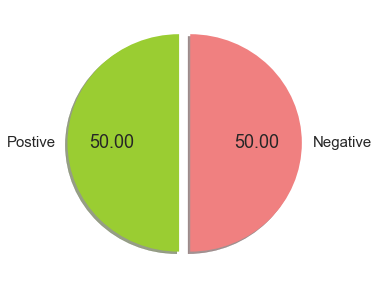

In [27]:
sns.set_context('notebook',font_scale=1.5)
labels =['Postive','Negative']
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0.1)
plt.figure(figsize=(5,5))
plt.pie(y_train.value_counts(),labels=labels,colors=colors,explode=explode, shadow=True, startangle=90, autopct='%.2f');

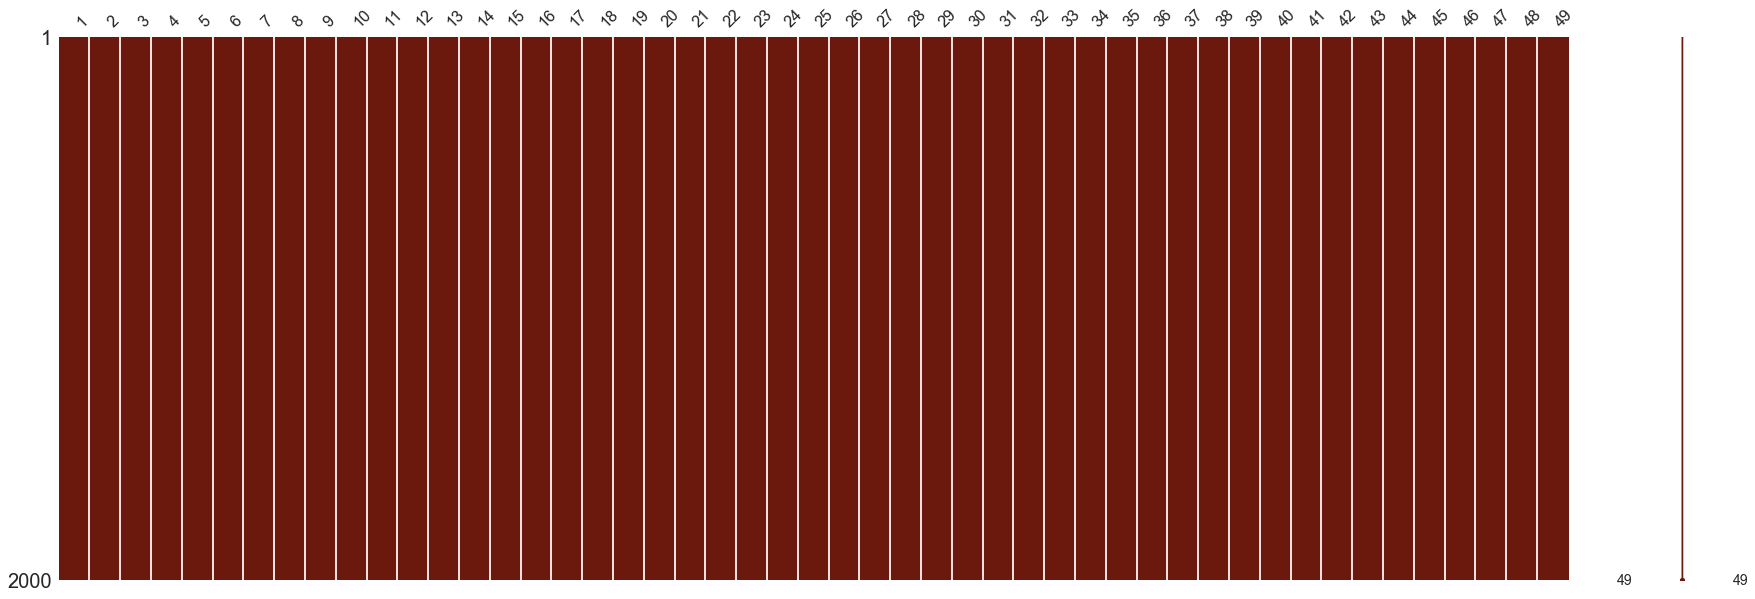

In [35]:
#Use blank/white to visualize all the missing values accross the variables
train_copy = X
train_copy = train_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,1:50], figsize=(30, 10), color=(0.42, 0.1, 0.05))

In [104]:
#count the numbers of int64, float64, bool or object/string features
train = X
int_features = train.select_dtypes(include = ['int64']).columns.values
float_features = train.select_dtypes(include = ['float64']).columns.values
bool_features= train.select_dtypes(include = ['bool']).columns.values
categorical_features = train.select_dtypes(include = ['object']).columns.values
print('int_features:', int_features) #, 'count of int_features:'count(int_features)
print('float_features:', float_features)
print('bool_features:', bool_features)
print('categorical_features:', categorical_features)

int_features: []
float_features: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

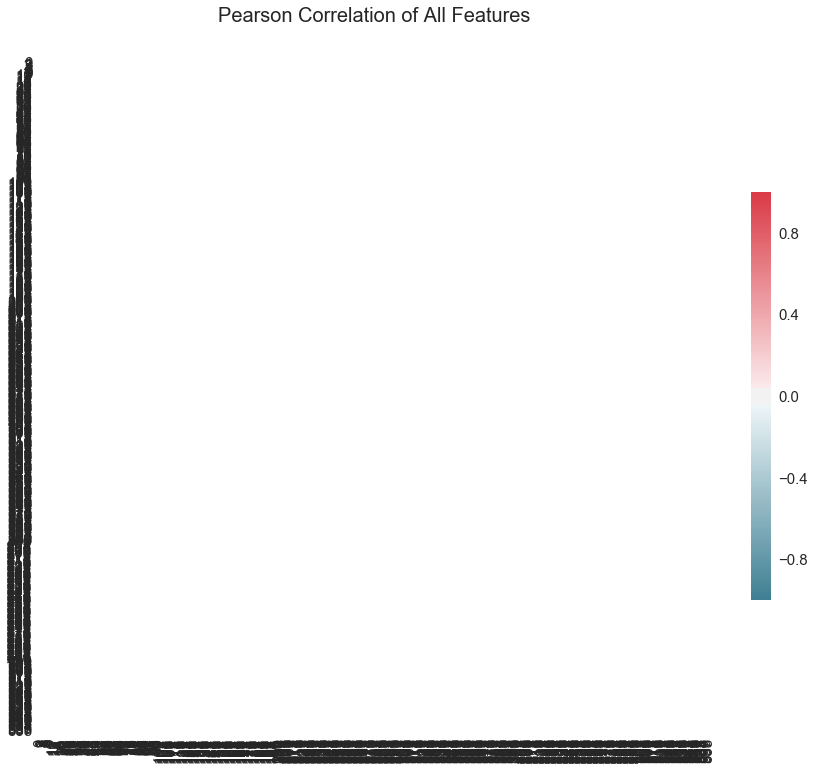

In [105]:
corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


plt.title('Pearson Correlation of All Features', y=1.05, size=20)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [42]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

# Create an XGBoost-compatible metric from Gini

def gini_coefficient(preds,dtrain):
    y = dtrain.get_label()
    return 'gini', -gini_normalized(y,preds)

In [44]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score
import xgboost as xgb

In [97]:
# try simple models 101 without class_weight='balanced'
clfs = {'LogisticRegression':LogisticRegression(class_weight='balanced'),
        'SVC': SVC(),
        'KNeighborsClassifier': KNeighborsClassifier(n_neighbors = 2),
        'GaussianNB': GaussianNB(), 
        'Perceptron': Perceptron(max_iter=1000), 
        'LinearSVC': LinearSVC(), 
        'SGDClassifier': SGDClassifier(max_iter=1000), 
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
        'XGBoostClassifier': xgb.XGBClassifier(max_depth=5, n_estimators=500, learning_rate=0.02)
       }

for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    ypred = clf.predict(X_test)
    gini_ = gini_normalized(y_test,ypred)
    precision_ = precision_score(ypred, y_test)
    accuracy_ = accuracy_score(ypred,y_test)
    f1_ = f1_score(ypred,y_test)
    print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
          %(name, gini_, precision_, accuracy_, f1_))
print("-----------------------------------------------")

/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


LogisticRegression classifier: gini = nan, precision = 0.5480, accuracy = 0.5720, f1 score = 0.5615
SVC classifier: gini = nan, precision = 0.6040, accuracy = 0.6040, f1 score = 0.6040
KNeighborsClassifier classifier: gini = nan, precision = 0.3080, accuracy = 0.5440, f1 score = 0.4031
GaussianNB classifier: gini = nan, precision = 0.5680, accuracy = 0.5880, f1 score = 0.5796
Perceptron classifier: gini = nan, precision = 0.5480, accuracy = 0.5760, f1 score = 0.5638
LinearSVC classifier: gini = nan, precision = 0.5400, accuracy = 0.5600, f1 score = 0.5510
SGDClassifier classifier: gini = nan, precision = 0.5200, accuracy = 0.5440, f1 score = 0.5328
DecisionTreeClassifier classifier: gini = nan, precision = 0.7840, accuracy = 0.7540, f1 score = 0.7612


/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


RandomForestClassifier classifier: gini = nan, precision = 0.6160, accuracy = 0.6660, f1 score = 0.6484
XGBoostClassifier classifier: gini = nan, precision = 0.7720, accuracy = 0.7840, f1 score = 0.7814
-----------------------------------------------


/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [51]:
xgb2=xgb.XGBClassifier(max_depth=6, n_estimators=1500, learning_rate=0.01)

xgb2.fit(X_train,y_train)
ypred = xgb2.predict(X_test)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
      %(name, gini_, precision_, accuracy_, f1_))


XGBoostClassifier classifier: gini = nan, precision = 0.8160, accuracy = 0.8160, f1 score = 0.8160


/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [95]:
xgb3=xgb.XGBClassifier(max_depth=6, n_estimators=2000, learning_rate=0.01)

xgb3.fit(X_train,y_train)
ypred = xgb3.predict(X_test)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
      %(name, gini_, precision_, accuracy_, f1_))


Extra Tree classifier: gini = nan, precision = 0.8120, accuracy = 0.8160, f1 score = 0.8153


/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


## Hyperparameters tuning

In [125]:
# 5 fold cross validation is more accurate than using a single validation set
path1 = 'obtrain-ml.csv'
df = pd.read_csv(path1, header=None)
y = df[559]
X = df.drop(559,axis=1)
y = y.replace([-1.0], 0)


# set the seed of random number generator, which is useful for creating simulations 
# or random objects that can be reproduced.
import random
SEED=3
random.seed(SEED)
np.random.seed(SEED)

cv_folds = 5
early_stopping_rounds = 200
model=xgb.XGBClassifier(seed = SEED)
xgb_param = model.get_xgb_params()
model.set_params(learning_rate=0.01)

xgtrain = xgb.DMatrix(X, y)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round = 2000, nfold = cv_folds, metrics = 'auc', early_stopping_rounds = early_stopping_rounds, seed = SEED)
print (cvresult)
print ("Optimal number of trees (estimators) is %i" % cvresult.shape[0])

    test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0        0.762785      0.022983        0.780396       0.008347
1        0.774736      0.030948        0.795813       0.013045
2        0.782900      0.027864        0.807234       0.008762
3        0.777266      0.026038        0.810694       0.007145
4        0.777853      0.026447        0.814895       0.008318
5        0.774053      0.027933        0.819128       0.008706
6        0.785716      0.029594        0.831479       0.003356
7        0.790611      0.031760        0.838475       0.002462
8        0.790864      0.031654        0.842551       0.003344
9        0.792218      0.031253        0.844344       0.004446
10       0.791792      0.030189        0.850149       0.004379
11       0.793562      0.030894        0.859098       0.003450
12       0.794262      0.029895        0.865700       0.003741
13       0.793089      0.028066        0.869413       0.004475
14       0.791848      0.028333        0.875063       0

In [128]:
from sklearn.grid_search import GridSearchCV
# using features, labels, cv_folds, model from previous example
model.set_params(n_estimators = 21)
param_test1 = {
'max_depth': [4,5,6,7],
'min_child_weight': [1,2,3,4]
}
gsearch1 = GridSearchCV(estimator = model, param_grid = param_test1, scoring = 'roc_auc', n_jobs = 4, iid = False, cv = cv_folds, verbose = 10)
gsearch1.fit(X,y)
#print gsearch1.grid_scores_
print (gsearch1.best_params_)
print (gsearch1.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=4, min_child_weight=1 .................................
[CV] max_depth=4, min_child_weight=1 .................................
[CV] max_depth=4, min_child_weight=1 .................................
[CV] max_depth=4, min_child_weight=1 .................................
[CV] ........ max_depth=4, min_child_weight=1, score=0.866750 -   2.0s
[CV] ........ max_depth=4, min_child_weight=1, score=0.870375 -   2.0s
[CV] max_depth=4, min_child_weight=1 .................................
[CV] max_depth=4, min_child_weight=2 .................................
[CV] ........ max_depth=4, min_child_weight=1, score=0.820112 -   2.0s
[CV] max_depth=4, min_child_weight=2 .................................
[CV] ........ max_depth=4, min_child_weight=1, score=0.840525 -   2.0s
[CV] max_depth=4, min_child_weight=2 .................................
[CV] ........ max_depth=4, min_child_weight=2, score=0.861225 -   2.0s
[CV] ........ ma

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.1s


[CV] ........ max_depth=4, min_child_weight=2, score=0.819787 -   2.1s
[CV] ........ max_depth=4, min_child_weight=3, score=0.869250 -   2.0s
[CV] max_depth=4, min_child_weight=3 .................................
[CV] max_depth=4, min_child_weight=3 .................................
[CV] ........ max_depth=4, min_child_weight=2, score=0.841225 -   2.2s
[CV] max_depth=4, min_child_weight=3 .................................
[CV] ........ max_depth=4, min_child_weight=3, score=0.862400 -   2.2s
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.2s


[CV] ........ max_depth=4, min_child_weight=3, score=0.820850 -   2.0s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........ max_depth=4, min_child_weight=3, score=0.841225 -   1.9s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........ max_depth=4, min_child_weight=3, score=0.840050 -   2.1s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........ max_depth=4, min_child_weight=4, score=0.862750 -   2.1s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] ........ max_depth=4, min_child_weight=4, score=0.867600 -   2.0s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........ max_depth=4, min_child_weight=4, score=0.840762 -   2.1s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........ max_depth=4, min_child_weight=4, score=0.821375 -   2.1s
[CV] max_depth=5, min_child_weight=1 .................................


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.3s


[CV] ........ max_depth=4, min_child_weight=4, score=0.841875 -   2.1s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=1, score=0.877013 -   2.5s
[CV] max_depth=5, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=1, score=0.840400 -   2.5s
[CV] max_depth=5, min_child_weight=2 .................................
[CV] ........ max_depth=5, min_child_weight=1, score=0.891462 -   2.6s
[CV] ........ max_depth=5, min_child_weight=1, score=0.847125 -   2.4s
[CV] max_depth=5, min_child_weight=2 .................................
[CV] max_depth=5, min_child_weight=2 .................................


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   13.0s


[CV] ........ max_depth=5, min_child_weight=1, score=0.852388 -   2.6s
[CV] max_depth=5, min_child_weight=2 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.872762 -   2.6s
[CV] max_depth=5, min_child_weight=2 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.848637 -   2.7s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.901000 -   2.8s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.842813 -   2.5s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] ........ max_depth=5, min_child_weight=2, score=0.854387 -   2.5s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] ........ max_depth=5, min_child_weight=3, score=0.873637 -   2.5s
[CV] max_depth=5, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   20.6s


[CV] max_depth=5, min_child_weight=4 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.871537 -   2.5s
[CV] max_depth=5, min_child_weight=4 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.892750 -   3.1s
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.858063 -   3.0s
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.834500 -   3.0s
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=5, min_child_weight=4, score=0.850487 -   3.0s
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=6, min_child_weight=1, score=0.870713 -   3.3s
[CV] max_depth=6, min_child_weight=1 .................................
[CV] ........ max_depth=6, min_child_weight=1, score=0.886950 -   3.3s
[CV] m

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.1s


[CV] ........ max_depth=6, min_child_weight=1, score=0.847388 -   3.4s
[CV] max_depth=6, min_child_weight=2 .................................
[CV] ........ max_depth=6, min_child_weight=2, score=0.880612 -   3.1s
[CV] max_depth=6, min_child_weight=2 .................................
[CV] ........ max_depth=6, min_child_weight=1, score=0.830137 -   3.2s
[CV] max_depth=6, min_child_weight=2 .................................
[CV] ........ max_depth=6, min_child_weight=2, score=0.901288 -   3.3s
[CV] max_depth=6, min_child_weight=3 .................................
[CV] ........ max_depth=6, min_child_weight=2, score=0.839875 -   3.1s
[CV] max_depth=6, min_child_weight=3 .................................
[CV] ........ max_depth=6, min_child_weight=2, score=0.843688 -   3.9s
[CV] ........ max_depth=6, min_child_weight=2, score=0.840000 -   4.0s
[CV] max_depth=6, min_child_weight=3 .................................
[CV] max_depth=6, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   38.0s


[CV] ........ max_depth=6, min_child_weight=3, score=0.842612 -   3.9s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] ........ max_depth=6, min_child_weight=4, score=0.887900 -   3.6s
[CV] ........ max_depth=6, min_child_weight=4, score=0.821050 -   3.5s
[CV] max_depth=7, min_child_weight=1 .................................
[CV] max_depth=7, min_child_weight=1 .................................
[CV] ........ max_depth=6, min_child_weight=4, score=0.841500 -   3.8s
[CV] max_depth=7, min_child_weight=1 .................................
[CV] ........ max_depth=6, min_child_weight=4, score=0.850600 -   3.6s
[CV] max_depth=7, min_child_weight=1 .................................
[CV] ........ max_depth=7, min_child_weight=1, score=0.865200 -   4.3s
[CV] max_depth=7, min_child_weight=1 .................................
[CV] ........ max_depth=7, min_child_weight=1, score=0.883700 -   4.3s
[CV] max_depth=7, min_child_weight=2 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   46.5s


[CV] ........ max_depth=7, min_child_weight=2, score=0.870325 -   3.9s
[CV] max_depth=7, min_child_weight=2 .................................
[CV] ........ max_depth=7, min_child_weight=2, score=0.904613 -   3.9s
[CV] ........ max_depth=7, min_child_weight=1, score=0.825163 -   4.1s
[CV] max_depth=7, min_child_weight=2 .................................
[CV] max_depth=7, min_child_weight=3 .................................
[CV] ........ max_depth=7, min_child_weight=2, score=0.833850 -   3.8s
[CV] max_depth=7, min_child_weight=3 .................................
[CV] ........ max_depth=7, min_child_weight=3, score=0.880438 -   3.9s
[CV] max_depth=7, min_child_weight=3 .................................
[CV] ........ max_depth=7, min_child_weight=2, score=0.843350 -   4.2s
[CV] max_depth=7, min_child_weight=3 .................................
[CV] ........ max_depth=7, min_child_weight=2, score=0.836588 -   4.2s
[CV] max_depth=7, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  1.0min finished


{'max_depth': 5, 'min_child_weight': 3}
0.86394


In [130]:
# using features, labels, cv_folds, model from previous example
model.set_params(n_estimators = 21)
model.set_params(max_depth = 5)
model.set_params(min_child_weight = 3)
param_test2 = {
'gamma':[i/10.0 for i in range(0,9)]
}
gsearch2 = GridSearchCV(estimator = model, param_grid = param_test2, scoring = 'roc_auc',n_jobs = 4, iid = False, cv = cv_folds, verbose = 10)
gsearch2.fit(X,y)
print (gsearch2.best_params_)
print (gsearch2.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] gamma=0.0 .......................................................
[CV] gamma=0.0 .......................................................
[CV] gamma=0.0 .......................................................
[CV] gamma=0.0 .......................................................
[CV] .............................. gamma=0.0, score=0.895625 -   2.4s
[CV] .............................. gamma=0.0, score=0.841250 -   2.3s
[CV] .............................. gamma=0.0, score=0.873637 -   2.4s
[CV] gamma=0.0 .......................................................
[CV] gamma=0.1 .......................................................
[CV] gamma=0.1 .......................................................
[CV] .............................. gamma=0.0, score=0.850425 -   2.4s
[CV] gamma=0.1 .......................................................
[CV] .............................. gamma=0.1, score=0.896000 -   2.3s
[CV] gamma=0.1 ..

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.8s


[CV] .............................. gamma=0.1, score=0.841338 -   2.5s
[CV] gamma=0.2 .......................................................
[CV] .............................. gamma=0.1, score=0.858762 -   2.5s
[CV] .............................. gamma=0.2, score=0.896075 -   2.4s
[CV] gamma=0.2 .......................................................
[CV] gamma=0.2 .......................................................
[CV] .............................. gamma=0.2, score=0.873637 -   2.5s
[CV] gamma=0.3 .......................................................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    7.4s


[CV] .............................. gamma=0.2, score=0.850425 -   2.8s
[CV] gamma=0.3 .......................................................
[CV] .............................. gamma=0.3, score=0.873637 -   2.7s
[CV] gamma=0.3 .......................................................
[CV] .............................. gamma=0.2, score=0.841338 -   2.8s
[CV] gamma=0.3 .......................................................
[CV] .............................. gamma=0.2, score=0.858762 -   2.9s
[CV] gamma=0.3 .......................................................
[CV] .............................. gamma=0.3, score=0.896075 -   2.4s
[CV] gamma=0.4 .......................................................
[CV] .............................. gamma=0.3, score=0.850425 -   2.4s
[CV] .............................. gamma=0.3, score=0.841338 -   2.4s
[CV] gamma=0.4 .......................................................
[CV] gamma=0.4 .......................................................


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   12.6s


[CV] .............................. gamma=0.3, score=0.858762 -   2.4s
[CV] gamma=0.4 .......................................................
[CV] .............................. gamma=0.4, score=0.873637 -   3.5s
[CV] gamma=0.4 .......................................................
[CV] .............................. gamma=0.4, score=0.896125 -   3.5s
[CV] gamma=0.5 .......................................................
[CV] .............................. gamma=0.4, score=0.850425 -   3.6s
[CV] gamma=0.5 .......................................................
[CV] .............................. gamma=0.4, score=0.841312 -   3.7s
[CV] gamma=0.5 .......................................................


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   16.5s


[CV] .............................. gamma=0.4, score=0.858762 -   3.5s
[CV] gamma=0.5 .......................................................
[CV] .............................. gamma=0.5, score=0.873637 -   3.5s
[CV] gamma=0.5 .......................................................
[CV] .............................. gamma=0.5, score=0.896125 -   3.5s
[CV] gamma=0.6 .......................................................
[CV] .............................. gamma=0.5, score=0.850425 -   3.5s
[CV] gamma=0.6 .......................................................
[CV] .............................. gamma=0.5, score=0.841312 -   3.2s
[CV] gamma=0.6 .......................................................
[CV] .............................. gamma=0.5, score=0.858762 -   3.2s
[CV] gamma=0.6 .......................................................
[CV] .............................. gamma=0.6, score=0.873637 -   3.3s
[CV] gamma=0.6 .......................................................
[CV] .

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   25.9s


[CV] .............................. gamma=0.7, score=0.873637 -   3.0s
[CV] gamma=0.7 .......................................................
[CV] .............................. gamma=0.7, score=0.896125 -   2.9s
[CV] gamma=0.8 .......................................................
[CV] .............................. gamma=0.7, score=0.840712 -   2.8s
[CV] .............................. gamma=0.7, score=0.850425 -   2.8s
[CV] gamma=0.8 .......................................................
[CV] gamma=0.8 .......................................................
[CV] .............................. gamma=0.7, score=0.858962 -   2.8s
[CV] gamma=0.8 .......................................................
[CV] .............................. gamma=0.8, score=0.873637 -   3.2s
[CV] gamma=0.8 .......................................................
[CV] .............................. gamma=0.8, score=0.896125 -   3.1s
[CV] .............................. gamma=0.8, score=0.850237 -   3.2s
[CV] .

[Parallel(n_jobs=4)]: Done  43 out of  45 | elapsed:   32.1s remaining:    1.5s


[CV] .............................. gamma=0.8, score=0.858963 -   1.7s


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   33.6s finished


{'gamma': 0.4}
0.8640525


In [131]:
model.set_params(learning_rate=0.01)
model.set_params(max_depth = 5)
model.set_params(min_child_weight = 3)
model.set_params(gamma = 0.4)
xgtrain = xgb.DMatrix(X, y)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round = 2000, nfold = cv_folds, metrics = 'auc', early_stopping_rounds = early_stopping_rounds, seed = SEED)
print (cvresult)
print ("Optimal number of trees (estimators) is %i" % cvresult.shape[0])

    test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0        0.762785      0.022983        0.780396       0.008347
1        0.774736      0.030948        0.795813       0.013045
2        0.782900      0.027864        0.807234       0.008762
3        0.777266      0.026038        0.810694       0.007145
4        0.777853      0.026447        0.814895       0.008318
5        0.774053      0.027933        0.819128       0.008706
6        0.785716      0.029594        0.831479       0.003356
7        0.790611      0.031760        0.838475       0.002462
8        0.790864      0.031654        0.842551       0.003344
9        0.792218      0.031253        0.844344       0.004446
10       0.791792      0.030189        0.850149       0.004379
11       0.793562      0.030894        0.859098       0.003450
12       0.794262      0.029895        0.865700       0.003741
13       0.793089      0.028066        0.869413       0.004475
14       0.791848      0.028333        0.875063       0

In [133]:
model.set_params(n_estimators = 21)
model.set_params(learning_rate=0.01)
model.set_params(max_depth = 5)
model.set_params(min_child_weight = 3)
model.set_params(gamma = 0.4)

param_test3 = {
'subsample' : [i/10.0 for i in range(6,11)],
'colsample_bytree' : [i/10.0 for i in range(6,11)]
}
gsearch3 = GridSearchCV(estimator = model, param_grid = param_test3, scoring = 'roc_auc',n_jobs = 4, iid = False, cv = cv_folds, verbose = 25)
gsearch3.fit(X,y)
print (gsearch3.best_params_)
print (gsearch3.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] .... colsample_bytree=0.6, subsample=0.6, score=0.847775 -   1.3s
[CV] .... colsample_bytree=0.6, subsample=0.6, score=0.895750 -   1.3s
[CV] colsample_bytree=0.6, subsample=0.6 .............................
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] .... colsample_bytree=0.6, subsample=0.6, score=0.862075 -   1.3s
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] .... colsample_bytree=0.6, subsample=0.6, score=0.843650 -   1.3s
[CV] colsample_bytree=0.6, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    1.4s


[CV] .... colsample_bytree=0.6, subsample=0.6, score=0.882825 -   1.3s
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] .... colsample_bytree=0.6, subsample=0.7, score=0.866375 -   1.4s
[CV] .... colsample_bytree=0.6, subsample=0.7, score=0.897875 -   1.4s
[CV] colsample_bytree=0.6, subsample=0.7 .............................
[CV] colsample_bytree=0.6, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    2.8s


[CV] .... colsample_bytree=0.6, subsample=0.7, score=0.871625 -   1.4s
[CV] colsample_bytree=0.6, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    2.9s


[CV] .... colsample_bytree=0.6, subsample=0.7, score=0.860250 -   1.5s
[CV] colsample_bytree=0.6, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    4.2s


[CV] .... colsample_bytree=0.6, subsample=0.7, score=0.879425 -   1.6s
[CV] colsample_bytree=0.6, subsample=0.8 .............................
[CV] .... colsample_bytree=0.6, subsample=0.8, score=0.876875 -   1.7s
[CV] colsample_bytree=0.6, subsample=0.8 .............................
[CV] .... colsample_bytree=0.6, subsample=0.8, score=0.909875 -   1.7s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    4.6s


[CV] .... colsample_bytree=0.6, subsample=0.8, score=0.875125 -   1.6s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:    5.9s


[CV] .... colsample_bytree=0.6, subsample=0.8, score=0.862112 -   1.6s
[CV] colsample_bytree=0.6, subsample=0.9 .............................
[CV] .... colsample_bytree=0.6, subsample=0.8, score=0.887225 -   1.6s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    6.1s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:    6.2s


[CV] .... colsample_bytree=0.6, subsample=0.9, score=0.877250 -   1.8s
[CV] colsample_bytree=0.6, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  16 tasks      | elapsed:    6.4s


[CV] .... colsample_bytree=0.6, subsample=0.9, score=0.910488 -   1.6s
[CV] colsample_bytree=0.6, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    7.5s


[CV] .... colsample_bytree=0.6, subsample=0.9, score=0.886575 -   1.6s
[CV] colsample_bytree=0.6, subsample=1.0 .............................
[CV] .... colsample_bytree=0.6, subsample=0.9, score=0.868425 -   1.6s
[CV] colsample_bytree=0.6, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  18 tasks      | elapsed:    7.7s
[Parallel(n_jobs=4)]: Done  19 tasks      | elapsed:    7.8s


[CV] .... colsample_bytree=0.6, subsample=0.9, score=0.885663 -   1.6s
[CV] colsample_bytree=0.6, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  20 tasks      | elapsed:    8.0s


[CV] .... colsample_bytree=0.6, subsample=1.0, score=0.892350 -   1.7s
[CV] colsample_bytree=0.6, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  21 tasks      | elapsed:    9.2s


[CV] .... colsample_bytree=0.6, subsample=1.0, score=0.915525 -   1.7s
[CV] colsample_bytree=0.7, subsample=0.6 .............................
[CV] .... colsample_bytree=0.6, subsample=1.0, score=0.879175 -   1.7s
[CV] colsample_bytree=0.7, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  22 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done  23 tasks      | elapsed:    9.5s


[CV] .... colsample_bytree=0.6, subsample=1.0, score=0.870212 -   1.7s
[CV] colsample_bytree=0.7, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    9.7s


[CV] .... colsample_bytree=0.6, subsample=1.0, score=0.881037 -   2.0s
[CV] colsample_bytree=0.7, subsample=0.6 .............................
[CV] .... colsample_bytree=0.7, subsample=0.6, score=0.891500 -   1.7s
[CV] .... colsample_bytree=0.7, subsample=0.6, score=0.854025 -   1.8s
[CV] colsample_bytree=0.7, subsample=0.7 .............................
[CV] colsample_bytree=0.7, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  25 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  26 tasks      | elapsed:   11.2s
[Parallel(n_jobs=4)]: Done  27 tasks      | elapsed:   11.2s


[CV] .... colsample_bytree=0.7, subsample=0.6, score=0.860525 -   1.7s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:   11.5s


[CV] .... colsample_bytree=0.7, subsample=0.6, score=0.841413 -   1.7s
[CV] colsample_bytree=0.7, subsample=0.7 .............................
[CV] .... colsample_bytree=0.7, subsample=0.6, score=0.886625 -   1.7s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  29 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done  30 tasks      | elapsed:   13.0s


[CV] .... colsample_bytree=0.7, subsample=0.7, score=0.878425 -   1.9s
[CV] colsample_bytree=0.7, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  31 tasks      | elapsed:   13.1s


[CV] .... colsample_bytree=0.7, subsample=0.7, score=0.904288 -   1.9s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  32 tasks      | elapsed:   13.4s


[CV] .... colsample_bytree=0.7, subsample=0.7, score=0.874150 -   2.1s
[CV] colsample_bytree=0.7, subsample=0.8 .............................
[CV] .... colsample_bytree=0.7, subsample=0.7, score=0.874950 -   2.0s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done  34 tasks      | elapsed:   15.2s


[CV] .... colsample_bytree=0.7, subsample=0.7, score=0.863400 -   2.2s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  35 tasks      | elapsed:   15.2s


[CV] .... colsample_bytree=0.7, subsample=0.8, score=0.885500 -   2.3s
[CV] colsample_bytree=0.7, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  36 tasks      | elapsed:   15.8s


[CV] .... colsample_bytree=0.7, subsample=0.8, score=0.914625 -   2.2s
[CV] colsample_bytree=0.7, subsample=0.9 .............................
[CV] .... colsample_bytree=0.7, subsample=0.8, score=0.875750 -   2.2s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  37 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:   17.4s


[CV] .... colsample_bytree=0.7, subsample=0.8, score=0.864062 -   2.2s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  39 tasks      | elapsed:   17.5s


[CV] .... colsample_bytree=0.7, subsample=0.8, score=0.894088 -   2.3s
[CV] colsample_bytree=0.7, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:   18.0s


[CV] .... colsample_bytree=0.7, subsample=0.9, score=0.892425 -   2.3s
[CV] colsample_bytree=0.7, subsample=0.9 .............................
[CV] .... colsample_bytree=0.7, subsample=0.9, score=0.913050 -   2.3s
[CV] colsample_bytree=0.7, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  41 tasks      | elapsed:   19.6s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.8s


[CV] .... colsample_bytree=0.7, subsample=0.9, score=0.883525 -   2.4s
[CV] colsample_bytree=0.7, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  43 tasks      | elapsed:   20.0s


[CV] .... colsample_bytree=0.7, subsample=0.9, score=0.867325 -   2.3s
[CV] colsample_bytree=0.7, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:   20.3s


[CV] .... colsample_bytree=0.7, subsample=0.9, score=0.881850 -   2.3s
[CV] colsample_bytree=0.7, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  45 tasks      | elapsed:   22.0s


[CV] .... colsample_bytree=0.7, subsample=1.0, score=0.886900 -   2.4s
[CV] colsample_bytree=0.7, subsample=1.0 .............................
[CV] .... colsample_bytree=0.7, subsample=1.0, score=0.913062 -   2.3s
[CV] colsample_bytree=0.8, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done  47 tasks      | elapsed:   22.3s


[CV] .... colsample_bytree=0.7, subsample=1.0, score=0.866187 -   2.5s
[CV] colsample_bytree=0.8, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  48 tasks      | elapsed:   22.8s


[CV] .... colsample_bytree=0.7, subsample=1.0, score=0.862263 -   2.3s
[CV] colsample_bytree=0.8, subsample=0.6 .............................
[CV] .... colsample_bytree=0.8, subsample=0.6, score=0.865900 -   2.0s
[CV] colsample_bytree=0.8, subsample=0.6 .............................
[CV] .... colsample_bytree=0.7, subsample=1.0, score=0.869150 -   2.2s


[Parallel(n_jobs=4)]: Done  49 tasks      | elapsed:   24.3s
[Parallel(n_jobs=4)]: Done  50 tasks      | elapsed:   24.3s


[CV] colsample_bytree=0.8, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  51 tasks      | elapsed:   24.5s


[CV] .... colsample_bytree=0.8, subsample=0.6, score=0.893200 -   2.1s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  52 tasks      | elapsed:   24.9s


[CV] .... colsample_bytree=0.8, subsample=0.6, score=0.864225 -   2.1s
[CV] colsample_bytree=0.8, subsample=0.7 .............................
[CV] .... colsample_bytree=0.8, subsample=0.6, score=0.841662 -   2.0s
[CV] colsample_bytree=0.8, subsample=0.7 .............................
[CV] .... colsample_bytree=0.8, subsample=0.6, score=0.880100 -   2.0s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   26.3s
[Parallel(n_jobs=4)]: Done  54 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done  55 tasks      | elapsed:   26.5s


[CV] .... colsample_bytree=0.8, subsample=0.7, score=0.887500 -   2.1s
[CV] colsample_bytree=0.8, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:   27.0s


[CV] .... colsample_bytree=0.8, subsample=0.7, score=0.902625 -   2.2s
[CV] colsample_bytree=0.8, subsample=0.8 .............................
[CV] .... colsample_bytree=0.8, subsample=0.7, score=0.883500 -   2.2s
[CV] colsample_bytree=0.8, subsample=0.8 .............................
[CV] .... colsample_bytree=0.8, subsample=0.7, score=0.860200 -   2.2s
[CV] colsample_bytree=0.8, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:   28.6s
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:   28.6s
[Parallel(n_jobs=4)]: Done  59 tasks      | elapsed:   28.7s


[CV] .... colsample_bytree=0.8, subsample=0.7, score=0.866775 -   2.3s
[CV] colsample_bytree=0.8, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  60 tasks      | elapsed:   29.3s


[CV] .... colsample_bytree=0.8, subsample=0.8, score=0.912775 -   2.3s
[CV] colsample_bytree=0.8, subsample=0.8 .............................
[CV] .... colsample_bytree=0.8, subsample=0.8, score=0.885800 -   2.4s
[CV] colsample_bytree=0.8, subsample=0.9 .............................
[CV] .... colsample_bytree=0.8, subsample=0.8, score=0.876325 -   2.4s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  61 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done  63 tasks      | elapsed:   31.1s


[CV] .... colsample_bytree=0.8, subsample=0.8, score=0.862800 -   2.3s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   31.6s


[CV] .... colsample_bytree=0.8, subsample=0.8, score=0.887613 -   2.4s
[CV] colsample_bytree=0.8, subsample=0.9 .............................
[CV] .... colsample_bytree=0.8, subsample=0.9, score=0.889700 -   2.5s
[CV] colsample_bytree=0.8, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:   33.4s
[Parallel(n_jobs=4)]: Done  66 tasks      | elapsed:   33.5s


[CV] .... colsample_bytree=0.8, subsample=0.9, score=0.913550 -   2.5s
[CV] colsample_bytree=0.8, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  67 tasks      | elapsed:   33.6s


[CV] .... colsample_bytree=0.8, subsample=0.9, score=0.877700 -   2.5s
[CV] colsample_bytree=0.8, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:   34.2s


[CV] .... colsample_bytree=0.8, subsample=0.9, score=0.864263 -   2.5s
[CV] colsample_bytree=0.8, subsample=1.0 .............................
[CV] .... colsample_bytree=0.8, subsample=0.9, score=0.880713 -   2.5s
[CV] colsample_bytree=0.8, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  69 tasks      | elapsed:   35.9s
[Parallel(n_jobs=4)]: Done  70 tasks      | elapsed:   36.0s


[CV] .... colsample_bytree=0.8, subsample=1.0, score=0.883925 -   2.6s
[CV] colsample_bytree=0.8, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  71 tasks      | elapsed:   36.2s


[CV] .... colsample_bytree=0.8, subsample=1.0, score=0.908275 -   2.7s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  72 tasks      | elapsed:   36.9s


[CV] .... colsample_bytree=0.8, subsample=1.0, score=0.864350 -   2.6s
[CV] colsample_bytree=0.9, subsample=0.6 .............................
[CV] .... colsample_bytree=0.8, subsample=1.0, score=0.860162 -   2.6s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  73 tasks      | elapsed:   38.5s
[Parallel(n_jobs=4)]: Done  74 tasks      | elapsed:   38.6s


[CV] .... colsample_bytree=0.8, subsample=1.0, score=0.866112 -   2.7s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  75 tasks      | elapsed:   38.9s


[CV] .... colsample_bytree=0.9, subsample=0.6, score=0.864325 -   2.4s
[CV] colsample_bytree=0.9, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:   39.3s


[CV] .... colsample_bytree=0.9, subsample=0.6, score=0.892375 -   2.4s
[CV] colsample_bytree=0.9, subsample=0.7 .............................
[CV] .... colsample_bytree=0.9, subsample=0.6, score=0.855425 -   2.3s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:   40.9s
[Parallel(n_jobs=4)]: Done  78 tasks      | elapsed:   41.0s


[CV] .... colsample_bytree=0.9, subsample=0.6, score=0.843900 -   2.3s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  79 tasks      | elapsed:   41.3s


[CV] .... colsample_bytree=0.9, subsample=0.6, score=0.870500 -   2.2s
[CV] colsample_bytree=0.9, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done  80 tasks      | elapsed:   41.5s


[CV] .... colsample_bytree=0.9, subsample=0.7, score=0.878075 -   2.5s
[CV] colsample_bytree=0.9, subsample=0.7 .............................
[CV] .... colsample_bytree=0.9, subsample=0.7, score=0.901675 -   2.4s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  81 tasks      | elapsed:   43.5s
[Parallel(n_jobs=4)]: Done  82 tasks      | elapsed:   43.5s


[CV] .... colsample_bytree=0.9, subsample=0.7, score=0.870150 -   2.4s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  83 tasks      | elapsed:   43.7s


[CV] .... colsample_bytree=0.9, subsample=0.7, score=0.849475 -   2.6s
[CV] colsample_bytree=0.9, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done  84 tasks      | elapsed:   44.1s


[CV] .... colsample_bytree=0.9, subsample=0.7, score=0.865000 -   2.7s
[CV] colsample_bytree=0.9, subsample=0.8 .............................
[CV] .... colsample_bytree=0.9, subsample=0.8, score=0.878475 -   2.9s


[Parallel(n_jobs=4)]: Done  85 tasks      | elapsed:   46.2s
[Parallel(n_jobs=4)]: Done  86 tasks      | elapsed:   46.4s


[CV] colsample_bytree=0.9, subsample=0.8 .............................
[CV] .... colsample_bytree=0.9, subsample=0.8, score=0.902900 -   2.9s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  87 tasks      | elapsed:   46.6s


[CV] .... colsample_bytree=0.9, subsample=0.8, score=0.866900 -   2.8s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:   47.0s


[CV] .... colsample_bytree=0.9, subsample=0.8, score=0.851900 -   2.6s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  89 tasks      | elapsed:   48.8s


[CV] .... colsample_bytree=0.9, subsample=0.8, score=0.876838 -   2.6s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:   49.0s


[CV] .... colsample_bytree=0.9, subsample=0.9, score=0.875825 -   2.8s
[CV] colsample_bytree=0.9, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done  91 tasks      | elapsed:   49.4s


[CV] .... colsample_bytree=0.9, subsample=0.9, score=0.905050 -   2.7s
[CV] colsample_bytree=0.9, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:   49.7s


[CV] .... colsample_bytree=0.9, subsample=0.9, score=0.867975 -   2.4s
[CV] colsample_bytree=0.9, subsample=1.0 .............................
[CV] .... colsample_bytree=0.9, subsample=0.9, score=0.855675 -   2.3s
[CV] colsample_bytree=0.9, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  93 tasks      | elapsed:   51.2s
[Parallel(n_jobs=4)]: Done  94 tasks      | elapsed:   51.3s


[CV] .... colsample_bytree=0.9, subsample=0.9, score=0.869512 -   2.3s
[CV] colsample_bytree=0.9, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  95 tasks      | elapsed:   51.7s


[CV] .... colsample_bytree=0.9, subsample=1.0, score=0.881350 -   2.3s
[CV] colsample_bytree=0.9, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done  96 tasks      | elapsed:   52.1s


[CV] .... colsample_bytree=0.9, subsample=1.0, score=0.904812 -   2.4s
[CV] colsample_bytree=1.0, subsample=0.6 .............................
[CV] .... colsample_bytree=0.9, subsample=1.0, score=0.858763 -   2.4s
[CV] colsample_bytree=1.0, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  97 tasks      | elapsed:   53.6s
[Parallel(n_jobs=4)]: Done  98 tasks      | elapsed:   53.8s


[CV] .... colsample_bytree=0.9, subsample=1.0, score=0.855250 -   2.3s
[CV] colsample_bytree=1.0, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done  99 tasks      | elapsed:   54.1s


[CV] .... colsample_bytree=0.9, subsample=1.0, score=0.863800 -   2.3s
[CV] colsample_bytree=1.0, subsample=0.6 .............................


[Parallel(n_jobs=4)]: Done 100 tasks      | elapsed:   54.4s


[CV] .... colsample_bytree=1.0, subsample=0.6, score=0.864875 -   2.5s
[CV] colsample_bytree=1.0, subsample=0.6 .............................
[CV] .... colsample_bytree=1.0, subsample=0.6, score=0.900750 -   2.5s
[CV] colsample_bytree=1.0, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done 101 tasks      | elapsed:   56.1s
[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:   56.3s


[CV] .... colsample_bytree=1.0, subsample=0.6, score=0.858400 -   2.6s
[CV] colsample_bytree=1.0, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done 103 tasks      | elapsed:   56.6s


[CV] .... colsample_bytree=1.0, subsample=0.6, score=0.847288 -   2.7s
[CV] colsample_bytree=1.0, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done 104 tasks      | elapsed:   57.2s


[CV] .... colsample_bytree=1.0, subsample=0.6, score=0.869800 -   2.6s
[CV] colsample_bytree=1.0, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:   58.8s


[CV] .... colsample_bytree=1.0, subsample=0.7, score=0.880650 -   2.9s
[CV] colsample_bytree=1.0, subsample=0.7 .............................


[Parallel(n_jobs=4)]: Done 106 tasks      | elapsed:   59.2s


[CV] .... colsample_bytree=1.0, subsample=0.7, score=0.896800 -   2.9s
[CV] colsample_bytree=1.0, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done 107 tasks      | elapsed:   59.6s


[CV] .... colsample_bytree=1.0, subsample=0.7, score=0.868675 -   2.9s
[CV] colsample_bytree=1.0, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done 108 tasks      | elapsed:  1.0min


[CV] .... colsample_bytree=1.0, subsample=0.7, score=0.847200 -   2.9s
[CV] colsample_bytree=1.0, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done 109 tasks      | elapsed:  1.0min


[CV] .... colsample_bytree=1.0, subsample=0.7, score=0.871475 -   2.7s
[CV] colsample_bytree=1.0, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done 110 tasks      | elapsed:  1.0min


[CV] .... colsample_bytree=1.0, subsample=0.8, score=0.879750 -   3.0s
[CV] colsample_bytree=1.0, subsample=0.8 .............................


[Parallel(n_jobs=4)]: Done 111 tasks      | elapsed:  1.0min


[CV] .... colsample_bytree=1.0, subsample=0.8, score=0.901212 -   2.8s
[CV] colsample_bytree=1.0, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done 112 tasks      | elapsed:  1.0min


[CV] .... colsample_bytree=1.0, subsample=0.8, score=0.867825 -   3.1s
[CV] colsample_bytree=1.0, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done 113 tasks      | elapsed:  1.1min


[CV] .... colsample_bytree=1.0, subsample=0.8, score=0.856375 -   3.1s
[CV] colsample_bytree=1.0, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done 114 tasks      | elapsed:  1.1min


[CV] .... colsample_bytree=1.0, subsample=0.8, score=0.872475 -   3.1s
[CV] colsample_bytree=1.0, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done 115 tasks      | elapsed:  1.1min


[CV] .... colsample_bytree=1.0, subsample=0.9, score=0.883575 -   3.3s
[CV] colsample_bytree=1.0, subsample=0.9 .............................


[Parallel(n_jobs=4)]: Done 116 tasks      | elapsed:  1.1min


[CV] .... colsample_bytree=1.0, subsample=0.9, score=0.897162 -   3.1s
[CV] colsample_bytree=1.0, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done 117 tasks      | elapsed:  1.1min


[CV] .... colsample_bytree=1.0, subsample=0.9, score=0.863775 -   3.1s
[CV] colsample_bytree=1.0, subsample=1.0 .............................


[Parallel(n_jobs=4)]: Done 118 tasks      | elapsed:  1.1min


[CV] .... colsample_bytree=1.0, subsample=0.9, score=0.858487 -   3.2s
[CV] colsample_bytree=1.0, subsample=1.0 .............................
[CV] .... colsample_bytree=1.0, subsample=0.9, score=0.865175 -   3.1s
[CV] colsample_bytree=1.0, subsample=1.0 .............................
[CV] .... colsample_bytree=1.0, subsample=1.0, score=0.873637 -   3.0s
[CV] colsample_bytree=1.0, subsample=1.0 .............................
[CV] .... colsample_bytree=1.0, subsample=1.0, score=0.896125 -   3.0s
[CV] .... colsample_bytree=1.0, subsample=1.0, score=0.850425 -   2.8s
[CV] .... colsample_bytree=1.0, subsample=1.0, score=0.841312 -   2.5s
[CV] .... colsample_bytree=1.0, subsample=1.0, score=0.858762 -   1.8s


[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  1.2min finished


{'colsample_bytree': 0.6, 'subsample': 1.0}
0.88766


In [134]:
model.set_params(subsample=1.0)
model.set_params(colsample_bytree=0.6)
model.set_params(n_estimators = 21)
model.set_params(learning_rate=0.01)
model.set_params(max_depth = 5)
model.set_params(min_child_weight = 3)
model.set_params(gamma = 0.4)

param_test4 = {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch4 = GridSearchCV(estimator = model, param_grid = param_test4, scoring = 'roc_auc',n_jobs = 4, iid = False, cv = cv_folds, verbose = 2)
gsearch4.fit(X,y)
print (gsearch4.best_params_)
print (gsearch4.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=1e-05 .................................................
[CV] ........................................ reg_alpha=1e-05 -   2.3s
[CV] ........................................ reg_alpha=1e-05 -   2.3s
[CV] ........................................ reg_alpha=1e-05 -   2.3s
[CV] reg_alpha=1e-05 .................................................
[CV] reg_alpha=0.01 ..................................................
[CV] reg_alpha=0.01 ..................................................
[CV] ........................................ reg_alpha=1e-05 -   2.4s
[CV] reg_alpha=0.01 ..................................................
[CV] ......................................... reg_alpha=0.01 -   2.1s
[CV] reg_alpha=0.

[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   11.8s finished


{'reg_alpha': 0.1}
0.8879049999999999


In [139]:
model.set_params(subsample=1.0)
model.set_params(colsample_bytree=0.6)
model.set_params(n_estimators = 21)
model.set_params(learning_rate=0.01)
model.set_params(max_depth = 5)
model.set_params(min_child_weight = 3)
model.set_params(gamma = 0.4)

param_test5 = {
'reg_alpha':[i/1000.0 for i in range(8,13)]
}
gsearch5 = GridSearchCV(estimator = model, param_grid = param_test5, scoring = 'roc_auc',n_jobs = 4, iid = False, cv = cv_folds, verbose = 100)
gsearch5.fit(X,y)
print (gsearch5.best_params_)
print (gsearch5.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] reg_alpha=0.008 .................................................
[CV] reg_alpha=0.008 .................................................
[CV] reg_alpha=0.008 .................................................
[CV] reg_alpha=0.008 .................................................
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to new file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4681978768/44572-4792661944-565ad64fe25933183111a39484eb289d.pkl
Pickling array (shape=(559,), dtype=int64).
Pickling array (shape=(2000,), dtype=float64).
Pickling array (shape=(1600,), dtype=int64).
Pickling array (shape=(400,), dtype=int64).
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4681978768/44572-4792661944-565ad64fe25933183111a39484e

[CV] reg_alpha=0.01 ..................................................
[CV] ......................... reg_alpha=0.01, score=0.915500 -   2.2s
[CV] reg_alpha=0.011 .................................................
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    6.4s
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4681978768/44572-4792661944-565ad64fe25933183111a39484eb289d.pkl
Pickling array (shape=(559,), dtype=int64).
Pickling array (shape=(2000,), dtype=float64).
Pickling array (shape=(1600,), dtype=int64).
Pickling array (shape=(400,), dtype=int64).
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.4s
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4681978768/44572-4792661944-565ad64fe25933183111a39484eb289d.pkl

In [151]:
model.set_params(subsample=1.0)
model.set_params(colsample_bytree=0.6)
model.set_params(n_estimators = 21)
model.set_params(reg_alpha=0.011)
model.set_params(max_depth = 5)
model.set_params(min_child_weight = 3)
model.set_params(gamma = 0.4)

param_test6 = {
'learning_rate':[i/100000.0 for i in range(4492,4498,1)]
}
gsearch6 = GridSearchCV(estimator = model, param_grid = param_test6, scoring = 'roc_auc',n_jobs = 4, iid = False, cv = cv_folds, verbose = 200)
gsearch6.fit(X,y)
print (gsearch6.best_params_)
print (gsearch6.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] learning_rate=0.04492 ...........................................
[CV] learning_rate=0.04492 ...........................................
[CV] learning_rate=0.04492 ...........................................
[CV] learning_rate=0.04492 ...........................................
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to new file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4695616536/44572-4583030512-565ad64fe25933183111a39484eb289d.pkl
Pickling array (shape=(559,), dtype=int64).
Pickling array (shape=(2000,), dtype=float64).
Pickling array (shape=(1600,), dtype=int64).
Pickling array (shape=(400,), dtype=int64).
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4695616536/44572-4583030512-565ad64fe25933183111a39484e

[CV] .................. learning_rate=0.04494, score=0.910725 -   2.1s
[CV] learning_rate=0.04494 ...........................................
[CV] learning_rate=0.04495 ...........................................
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    6.3s
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4695616536/44572-4583030512-565ad64fe25933183111a39484eb289d.pkl
Pickling array (shape=(559,), dtype=int64).
Pickling array (shape=(2000,), dtype=float64).
Pickling array (shape=(1600,), dtype=int64).
Pickling array (shape=(400,), dtype=int64).
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.3s
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4695616536/44572-4583030512-565ad64fe25933183111a39484eb289d.pkl

[CV] .................. learning_rate=0.04496, score=0.885362 -   1.9s
[CV] .................. learning_rate=0.04497, score=0.894500 -   1.9s
[CV] learning_rate=0.04497 ...........................................
[CV] learning_rate=0.04497 ...........................................
[CV] .................. learning_rate=0.04497, score=0.910800 -   1.9s
[CV] .................. learning_rate=0.04497, score=0.895050 -   1.9s
[Parallel(n_jobs=4)]: Done  25 out of  30 | elapsed:   14.2s remaining:    2.8s
[Parallel(n_jobs=4)]: Done  26 out of  30 | elapsed:   14.2s remaining:    2.2s
[Parallel(n_jobs=4)]: Done  27 out of  30 | elapsed:   14.3s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  28 out of  30 | elapsed:   14.3s remaining:    1.0s
[CV] .................. learning_rate=0.04497, score=0.881362 -   1.2s
[CV] .................. learning_rate=0.04497, score=0.885188 -   1.2s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  30 o

In [157]:
model.set_params(subsample=1.0)
model.set_params(colsample_bytree=0.6)
model.set_params(n_estimators = 21)
model.set_params(reg_alpha=0.011)
model.set_params(max_depth = 5)
model.set_params(min_child_weight = 3)
model.set_params(gamma = 0.4)
model.set_params(learning_rate = 0.04496)


param_test7 = {
'reg_lambda': [i/1000 for i in range(1,20,4)]
}
gsearch7 = GridSearchCV(estimator = model, param_grid = param_test7, scoring = 'roc_auc',n_jobs = 4, iid = False, cv = cv_folds, verbose = 200)
gsearch7.fit(X,y)
print (gsearch7.best_params_)
print (gsearch7.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] reg_lambda=0.001 ................................................
[CV] reg_lambda=0.001 ................................................
[CV] reg_lambda=0.001 ................................................
[CV] reg_lambda=0.001 ................................................
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to new file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4682703144/44572-4744992080-565ad64fe25933183111a39484eb289d.pkl
Pickling array (shape=(559,), dtype=int64).
Pickling array (shape=(2000,), dtype=float64).
Pickling array (shape=(1600,), dtype=int64).
Pickling array (shape=(400,), dtype=int64).
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4682703144/44572-4744992080-565ad64fe25933183111a39484e

[CV] reg_lambda=0.009 ................................................
[CV] ....................... reg_lambda=0.009, score=0.913288 -   1.8s
[CV] reg_lambda=0.013 ................................................
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    5.8s
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4682703144/44572-4744992080-565ad64fe25933183111a39484eb289d.pkl
Pickling array (shape=(559,), dtype=int64).
Pickling array (shape=(2000,), dtype=float64).
Pickling array (shape=(1600,), dtype=int64).
Pickling array (shape=(400,), dtype=int64).
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.8s
Pickling array (shape=(559,), dtype=int64).
Memmaping (shape=(559, 2000), dtype=float64) to old file /var/folders/xs/py6_f0f11_d4vvgct3h4zp280000gn/T/joblib_memmaping_pool_44572_4682703144/44572-4744992080-565ad64fe25933183111a39484eb289d.pkl

colsample_bytree=0.6, gamma=0.0468, 
learning_rate=0.04496, max_depth=5, 
min_child_weight=3, n_estimators=2000,
reg_alpha=0.011, reg_lambda=0.005,
subsample=1, silent=1, nthread = -1

In [158]:
xgb10=xgb.XGBClassifier(colsample_bytree=0.6, gamma=0.0468, 
learning_rate=0.04496, max_depth=5, 
min_child_weight=3, n_estimators=2000,
reg_alpha=0.011, reg_lambda=0.005,
subsample=1, silent=1, nthread = -1)

xgb10.fit(X_train,y_train)
ypred = xgb10.predict(X_test)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
      %(name, gini_, precision_, accuracy_, f1_))


XGBoostClassifier classifier: gini = nan, precision = 0.7520, accuracy = 0.7420, f1 score = 0.7446


/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [166]:
xgb11=xgb.XGBClassifier(colsample_bytree=0.6, gamma=0.0468, 
learning_rate=0.04496, max_depth=5, 
min_child_weight=3, n_estimators=21,
reg_alpha=0.011, reg_lambda=0.005,
subsample=1, silent=1)

xgb11.fit(X_train,y_train)
ypred = xgb11.predict(X_test)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
      %(name, gini_, precision_, accuracy_, f1_))

XGBoostClassifier classifier: gini = nan, precision = 0.8280, accuracy = 0.8000, f1 score = 0.8054


/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [102]:
from sklearn import datasets, metrics, cross_validation
from sklearn import linear_model
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=10, test_size=.1, random_state=0)

path1 = 'obtrain-ml.csv'
df = pd.read_csv(path1, header=None)
y = df[559]
X = df.drop(559,axis=1)
# y = y.replace([-1.0], 0)

cv = rs.split(X)
linear_model.LogisticRegression
for i, (train, test) in enumerate(cv):
    clf = (C=1.)
    clf.fit(X.loc[train], y.loc[train])
    ypred = clf.predict(X.loc[test])
    actuals = y.loc[test]
    gini_ = gini_normalized(actuals,ypred)
    precision_ = precision_score(ypred, actuals)
#     accuracy_ = accuracy_score(ypred, actuals)
#     f1_ = f1_score(ypred,actuals)
    print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f'%(name, gini_, precision_, accuracy_, f1_))

    clf = linear_model.Ridge(alpha=1.)
    clf.fit(X.loc[train], y.loc[train])
    ypred = clf.predict(X.loc[test])
    actuals = y.loc[test]
    gini_ = gini_normalized(actuals,ypred)
    precision_ = precision_score(ypred, actuals)
#     accuracy_ = accuracy_score(ypred, actuals)
#     f1_ = f1_score(ypred,actuals)
    print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f'%(name, gini_, precision_, accuracy_, f1_))


XGBoostClassifier classifier: gini = 0.2311, precision = 0.6517, accuracy = 0.6200, f1 score = 0.6042


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [82]:
#other models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import classification_report_imbalanced
from collections import defaultdict

estimators = {'RandomForest':RandomForestClassifier(),'AdaBoost': AdaBoostClassifier(), 'Extra Tree': ExtraTreesClassifier()}

for name,clf in estimators.items():  
    clf_err = []
    cv = rs.split(X)
    for i, (train_index, test_index) in enumerate(cv):
#         print("%s Fold %s :"%(name, i+1))
        clf.fit(X.loc[train_index], y.loc[train_index])
        y_pred = clf.predict(X.loc[test_index])
        actuals = y.loc[test_index]
        s=metrics.accuracy_score(actuals, y_pred, normalize=True)
#         print(s)
        clf_err.append(s)
    print(name + 'accuracy_score： %s' % np.mean(clf_err))


RandomForest Fold 1 :
0.6
RandomForest Fold 2 :
0.56
RandomForest Fold 3 :
0.6
RandomForest Fold 4 :
0.57
RandomForest Fold 5 :
0.565
RandomForest Fold 6 :
0.635
RandomForest Fold 7 :
0.625
RandomForest Fold 8 :
0.645
RandomForest Fold 9 :
0.615
RandomForest Fold 10 :
0.585
RandomForestaccuracy_score： 0.6
AdaBoost Fold 1 :
0.62
AdaBoost Fold 2 :
0.61
AdaBoost Fold 3 :
0.56
AdaBoost Fold 4 :
0.58
AdaBoost Fold 5 :
0.605
AdaBoost Fold 6 :
0.59
AdaBoost Fold 7 :
0.62
AdaBoost Fold 8 :
0.53
AdaBoost Fold 9 :
0.63
AdaBoost Fold 10 :
0.56
AdaBoostaccuracy_score： 0.5905
Extra Tree Fold 1 :
0.62
Extra Tree Fold 2 :
0.535
Extra Tree Fold 3 :
0.525
Extra Tree Fold 4 :
0.54
Extra Tree Fold 5 :
0.545
Extra Tree Fold 6 :
0.485
Extra Tree Fold 7 :
0.555
Extra Tree Fold 8 :
0.53
Extra Tree Fold 9 :
0.555
Extra Tree Fold 10 :
0.6
Extra Treeaccuracy_score： 0.549
